<a href="https://colab.research.google.com/github/2003DEE/DEEPAK_FMML/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***DIABETES PREDICTION***

AUTHOR: DEEPAK C, AIML 'A'

---




*IMPORTING LIBRARIES*

---



In [225]:

import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
gc.enable()

*IMPORTING DATASET*

---



In [227]:
!wget "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"

--2023-06-29 07:04:34--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.8’

diabetes.csv.8      100%[===================>]  23.31K  --.-KB/s    in 0s      

2023-06-29 07:04:34 (50.8 MB/s) - ‘diabetes.csv.8’ saved [23873/23873]



In [228]:
data=pd.read_csv("diabetes.csv.5")

In [229]:
y=data['Outcome']
X=data.drop(['Outcome'],axis=1)

*TRAIN_TEST_SPLIT AND MODEL DEPLOYMENT*

---



In [230]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [231]:
from sklearn import svm
clf=svm.SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

*EVALUATION_METRICS AND VISUALIZATION*

---



In [232]:
from sklearn.metrics import classification_report,confusion_matrix

In [233]:
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[87,  8],
       [37, 22]])

Text(0.5, 1.0, 'Confusion Matrix')

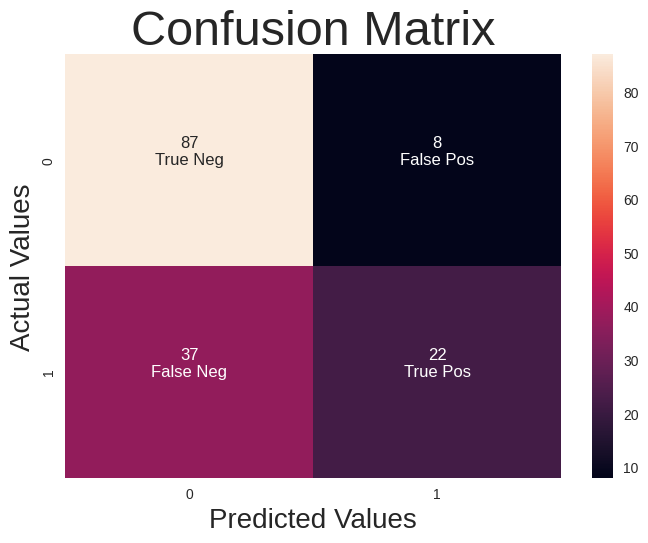

In [234]:
import seaborn as sns
label = ['True Neg','False Pos','False Neg','True Pos']
groups=[i for i in confusion.flatten()]
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(groups,label)]
labels=np.asarray(labels).reshape(2,2)
s=sns.heatmap(confusion,annot=labels,fmt='')
s.set_xlabel('Predicted Values', fontsize=20)
s.set_ylabel('Actual Values', fontsize=20)
s.set_title('Confusion Matrix',fontsize=35)

**TERMINOLOGY:**
  
  A **True positive** is an outcome where the model correctly predicts the **positive class**.

  A **True negative** is an outcome where the model correctly predicts the **negative class**.

  A **False positive** is an outcome where the model incorrectly predicts the **positive class**.

  A **False negative** is an outcome where the model incorrectly predicts the **negative class**.

---



Text(0.5, 1.0, 'Classfication_Report')

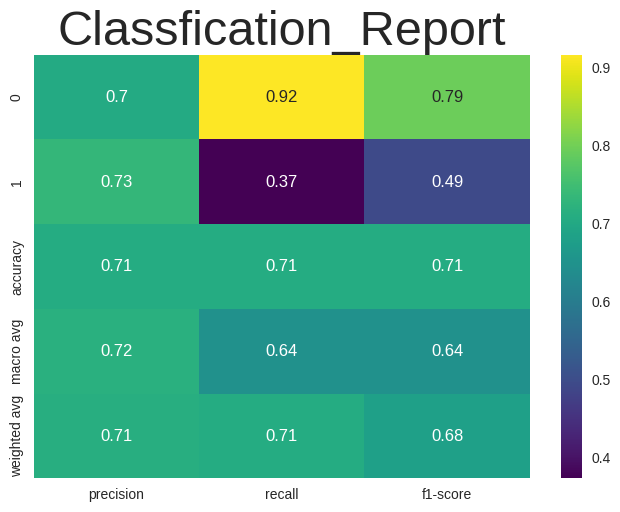

In [235]:
classify=classification_report(y_test,y_pred,output_dict=True)
v=sns.heatmap(pd.DataFrame(classify).iloc[:-1, :].T, annot=True,cmap='viridis')
v.set_title("Classfication_Report",fontsize=35)

**TERMINOLOGY:**

  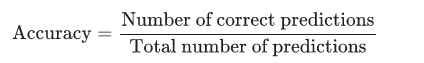

---




Precision attempts to answer the following question:

     What proportion of positive identifications was actually correct?

Precision is defined as follows:

 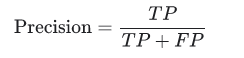



---




Recall attempts to answer the following question:

      What proportion of actual positives was identified correctly?

Mathematically, recall is defined as follows:

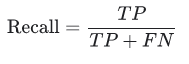




---




In [237]:
gc.disable()

**REFERENCES:**

https://developers.google.com/machine-learning/crash-course/classification/video-lecture

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

https://scikit-learn.org/stable/modules/svm.html#classification

https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report